In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from helper import *

In [2]:
pd.set_option('max_columns', 100)

# Prepare data

In [3]:
df = pd.read_csv('../data/historical_data/cleaned_data.csv')
print(df.shape)
df.head()

(525663, 51)


,raceid,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,KeiroCD,Barei,ChokyosiCode,Futan,Blinker,KisyuCode,BaTaijyu,Zogen,IJyoCD,Honsyokin,Kyori,Speed,Top 1,Top 3,KakuteiJyuni_fixed,Speed_fixed,UmaKigoCD_0,UmaKigoCD_1,UmaKigoCD_5,UmaKigoCD_6,UmaKigoCD_11,UmaKigoCD_21,UmaKigoCD_22,UmaKigoCD_26,SexCD_1,SexCD_2,SexCD_3,HinsyuCD_1,HinsyuCD_2,TozaiCD_1,TozaiCD_2,TozaiCD_3,TozaiCD_4,MinaraiCD_0,MinaraiCD_1,MinaraiCD_2,MinaraiCD_3,JyokenInfo$JyuryoCD_1.0,JyokenInfo$JyuryoCD_2.0,JyokenInfo$JyuryoCD_3.0,JyokenInfo$JyuryoCD_4.0,TrackCD_Dirt,TrackCD_Jump,TrackCD_Turf
0,2008-01-05 01:06,752,8,0,0,1,2005107051,3,3,437,540,0,1031,428,12.0,0,0,1200.0,1.595745,False,False,47.2,1.658768,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2008-01-05 01:06,739,1,0,0,2,2005102028,3,3,138,540,0,733,450,-10.0,0,50000,1200.0,1.623816,True,True,1.0,1.687948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2008-01-05 01:06,742,3,0,0,3,2005104156,3,3,1054,540,0,684,458,4.0,0,13000,1200.0,1.617251,False,True,14.2,1.681123,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2008-01-05 01:06,749,6,0,0,4,2005105319,3,3,1081,540,0,672,402,-10.0,0,0,1200.0,1.602136,False,False,34.0,1.665412,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2008-01-05 01:06,739,2,0,0,5,2005101044,3,3,1088,540,0,663,482,2.0,0,20000,1200.0,1.623816,False,True,7.6,1.687948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [4]:
print('Number of races in 2018:',df['raceid'].apply(lambda x: True if x.split('-')[0] == '2018' else False).sum())

Number of races in 2018: 25402


In [5]:
drop_cols = [
'IJyoCD', 
'KeiroCD', 
'ChokyosiCode', 
'Honsyokin',
'KettoNum',
'Time', 
'raceid', 
'racedate', 
'KakuteiJyuni', 
'KakuteiJyuni_fixed', 
'Top 1', 
'Top 3', 
'Speed', 
'Speed_fixed', 
'DochakuKubun', 
'DochakuTosu',
'KisyuCode']

In [6]:
X = df
y = df['Top 3']
top3 = df['Top 3']
raceid = df['raceid']
X_train, X_test, y_train, y_test, top3_train, top3_test, raceid_train, raceid_test = split_data(X, y, raceid, top3,
                                                                                                drop_columns=drop_cols,
                                                                                                select_cols=None,
                                                                                                test_size=25402)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(500261, 35) (500261,)
(25402, 35) (25402,)


,Umaban,Barei,Futan,Blinker,BaTaijyu,Zogen,Kyori,UmaKigoCD_0,UmaKigoCD_1,UmaKigoCD_5,UmaKigoCD_6,UmaKigoCD_11,UmaKigoCD_21,UmaKigoCD_22,UmaKigoCD_26,SexCD_1,SexCD_2,SexCD_3,HinsyuCD_1,HinsyuCD_2,TozaiCD_1,TozaiCD_2,TozaiCD_3,TozaiCD_4,MinaraiCD_0,MinaraiCD_1,MinaraiCD_2,MinaraiCD_3,JyokenInfo$JyuryoCD_1.0,JyokenInfo$JyuryoCD_2.0,JyokenInfo$JyuryoCD_3.0,JyokenInfo$JyuryoCD_4.0,TrackCD_Dirt,TrackCD_Jump,TrackCD_Turf
0,1,3,540,0,428,12.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,3,540,0,450,-10.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,3,540,0,458,4.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,3,540,0,402,-10.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5,3,540,0,482,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Metrics

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
def top3_accuracy_score(y_true, y_pred):
    return y_pred[y_true].sum()/y_true.sum()

# Baseline model

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

In [11]:
model_Log = LogisticRegression(max_iter=300)
model_Log.fit(scaler.transform(X_train), y_train)

LogisticRegression(max_iter=300)

In [12]:
top3_pred = predict_top3_prob(model_Log, scaler.transform(X_test), raceid_test)
print('Total accuracy:', accuracy_score(top3_test, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_test.values, top3_pred['Top 3'].values))

Total accuracy: 0.7150224391780174
Top 3 prediction accuracy: 0.3119318181818182


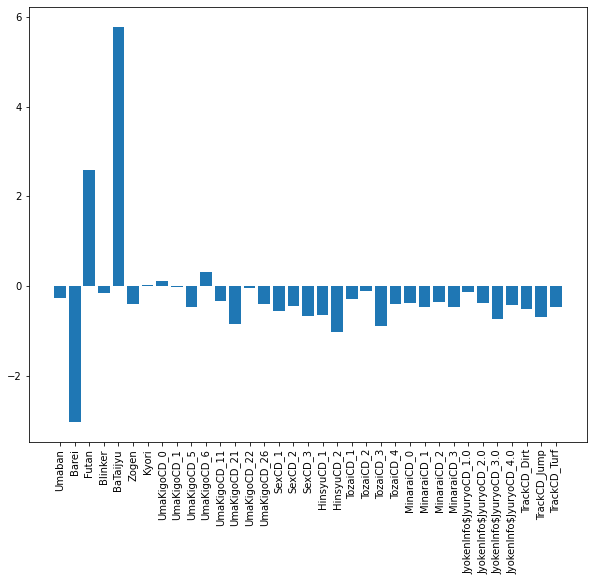

In [13]:
plt.figure(figsize=(10,8))
plt.bar(height=model_Log.coef_[0], x = X_train.columns)
xticks = plt.xticks(rotation=90)

# Better model

## Calculate some fields

In [10]:
df['Top 5'] = (df['KakuteiJyuni'] < 6) & (df['KakuteiJyuni'] != 0)
drop_cols.append('Top 5')

In [11]:
horse_exp = generate_exp('KettoNum')
df['Horse_exp'] = df.apply(horse_exp.generate_exp, axis=1)

top3_horse = generate_exp('KettoNum', val='Top 3')
df['Horse_top3'] = df.apply(top3_horse.generate_exp, axis=1)

horse_last_5 = generate_exp('KettoNum', val='KakuteiJyuni_fixed', k=5, init_val=250.)
df['Horse_last_5'] = df.apply(horse_last_5.generate_last_k_exp, axis=1)
horse_last_3 = generate_exp('KettoNum', val='KakuteiJyuni_fixed', k=3, init_val=150.)
df['Horse_last_3'] = df.apply(horse_last_3.generate_last_k_exp, axis=1)
horse_last_1 = generate_exp('KettoNum', val='KakuteiJyuni_fixed', k=1, init_val=50.)
df['Horse_last_1'] = df.apply(horse_last_1.generate_last_k_exp, axis=1)

horse_last_3_top3 = generate_exp('KettoNum', val='Top 3', k=3, init_val=0.6)
df['Horse_last_3_top3'] = df.apply(horse_last_3_top3.generate_last_k_exp, axis=1)

horse_last_3_top1 = generate_exp('KettoNum', val='Top 1', k=3, init_val=0.0)
df['Horse_last_3_top1'] = df.apply(horse_last_3_top1.generate_last_k_exp, axis=1)

horse_last_3_top5 = generate_exp('KettoNum', val='Top 5', k=3, init_val=1.)
df['Horse_last_3_top5'] = df.apply(horse_last_3_top5.generate_last_k_exp, axis=1)

horse_last_3_speed = generate_exp('KettoNum', val='Speed_fixed', k=3, init_val=1.6*3)
df['Horse_last_3_speed'] = df.apply(horse_last_3_speed.generate_last_k_exp, axis=1)

##################

jockey_exp = generate_exp('KisyuCode')
df['Jockey_exp'] = df.apply(jockey_exp.generate_exp, axis=1)

top3_jockey = generate_exp('KisyuCode', val='Top 3')
df['Jockey_top3'] = df.apply(top3_jockey.generate_exp, axis=1)

jockey_last_5 = generate_exp('KisyuCode', val='KakuteiJyuni_fixed', k=5, init_val=250.)
df['Jockey_last_5'] = df.apply(jockey_last_5.generate_last_k_exp, axis=1)

jockey_last_10 = generate_exp('KisyuCode', val='KakuteiJyuni_fixed', k=10, init_val=500.)
df['Jockey_last_10'] = df.apply(jockey_last_10.generate_last_k_exp, axis=1)

jockey_last_5_top3 = generate_exp('KisyuCode', val='Top 3', k=5, init_val=1.)
df['Jockey_last_5_top3'] = df.apply(jockey_last_5_top3.generate_last_k_exp, axis=1)
jockey_last_10_top3 = generate_exp('KisyuCode', val='Top 3', k=10, init_val=2.)
df['Jockey_last_10_top3'] = df.apply(jockey_last_10_top3.generate_last_k_exp, axis=1)

jockey_last_3_top5 = generate_exp('KisyuCode', val='Top 5', k=3, init_val=1.)
df['Jockey_last_3_top5'] = df.apply(jockey_last_3_top5.generate_last_k_exp, axis=1)
jockey_last_5_top5 = generate_exp('KisyuCode', val='Top 5', k=5, init_val=1.5)
df['Jockey_last_5_top5'] = df.apply(jockey_last_5_top5.generate_last_k_exp, axis=1)

jockey_last_5_speed = generate_exp('KisyuCode', val='Speed_fixed', k=5, init_val=1.6*5)
df['Jockey_last_5_speed'] = df.apply(jockey_last_5_speed.generate_last_k_exp, axis=1)
jockey_last_7_speed = generate_exp('KisyuCode', val='Speed_fixed', k=7, init_val=1.6*7)
df['Jockey_last_7_speed'] = df.apply(jockey_last_7_speed.generate_last_k_exp, axis=1)

##################
coach_exp = generate_exp('ChokyosiCode', val='Top 3')
df['Coach_exp'] = df.apply(coach_exp.generate_exp, axis=1)

In [12]:
df['Horse top 3 rate'] = df['Horse_top3']/(df['Horse_exp'] + 1e-6)
df['Jockey top 3 rate'] = df['Jockey_top3']/(df['Jockey_exp'] + 1e-6)
df.isna().sum().sum()

0

## Split data

In [10]:
X = df
y = df['Top 3']
top3 = df['Top 3']
raceid = df['raceid']
X_train, X_test, y_train, y_test, top3_train, top3_test, raceid_train, raceid_test = split_data(X, y, raceid, top3,
                                                                                                drop_columns=drop_cols,
                                                                                                select_cols=None,
                                                                                                test_size=25402)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(500261, 57) (500261,)
(25402, 57) (25402,)


,Umaban,Barei,Futan,Blinker,BaTaijyu,Zogen,Kyori,UmaKigoCD_0,UmaKigoCD_1,UmaKigoCD_5,UmaKigoCD_6,UmaKigoCD_11,UmaKigoCD_21,UmaKigoCD_22,UmaKigoCD_26,SexCD_1,SexCD_2,SexCD_3,HinsyuCD_1,HinsyuCD_2,TozaiCD_1,TozaiCD_2,TozaiCD_3,TozaiCD_4,MinaraiCD_0,MinaraiCD_1,MinaraiCD_2,MinaraiCD_3,JyokenInfo$JyuryoCD_1.0,JyokenInfo$JyuryoCD_2.0,JyokenInfo$JyuryoCD_3.0,JyokenInfo$JyuryoCD_4.0,TrackCD_Dirt,TrackCD_Jump,TrackCD_Turf,Horse_exp,Horse_top3,Horse_last_5,Horse_last_3,Horse_last_1,Horse_last_3_top3,Horse_last_3_top1,Horse_last_3_top5,Horse_last_3_speed,Jockey_exp,Jockey_top3,Jockey_last_5,Jockey_last_10,Jockey_last_5_top3,Jockey_last_10_top3,Jockey_last_3_top5,Jockey_last_5_top5,Jockey_last_5_speed,Jockey_last_7_speed,Coach_exp,Horse top 3 rate,Jockey top 3 rate
0,1,3,540,0,428,12.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,150.0,50.0,0.6,0.0,1.0,4.8,0.0,0.0,250.0,500.0,1.0,2.0,1.0,1.5,8.0,11.2,0.0,0.0,0.0
1,2,3,540,0,450,-10.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,150.0,50.0,0.6,0.0,1.0,4.8,0.0,0.0,250.0,500.0,1.0,2.0,1.0,1.5,8.0,11.2,0.0,0.0,0.0
2,3,3,540,0,458,4.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,150.0,50.0,0.6,0.0,1.0,4.8,0.0,0.0,250.0,500.0,1.0,2.0,1.0,1.5,8.0,11.2,0.0,0.0,0.0
3,4,3,540,0,402,-10.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,150.0,50.0,0.6,0.0,1.0,4.8,0.0,0.0,250.0,500.0,1.0,2.0,1.0,1.5,8.0,11.2,0.0,0.0,0.0
4,5,3,540,0,482,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,150.0,50.0,0.6,0.0,1.0,4.8,0.0,0.0,250.0,500.0,1.0,2.0,1.0,1.5,8.0,11.2,0.0,0.0,0.0


## Model

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [17]:
model_Log = LogisticRegression(max_iter=500, penalty='l2', C=0.1)
model_Log.fit(X_train_sc, y_train)

LogisticRegression(C=0.1, max_iter=500)

In [18]:
top3_pred = predict_top3_prob(model_Log, X_test_sc, raceid_test)
print('Total accuracy:', accuracy_score(top3_test, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_test.values, top3_pred['Top 3'].values))

Total accuracy: 0.780765294071333
Top 3 prediction accuracy: 0.4700757575757576


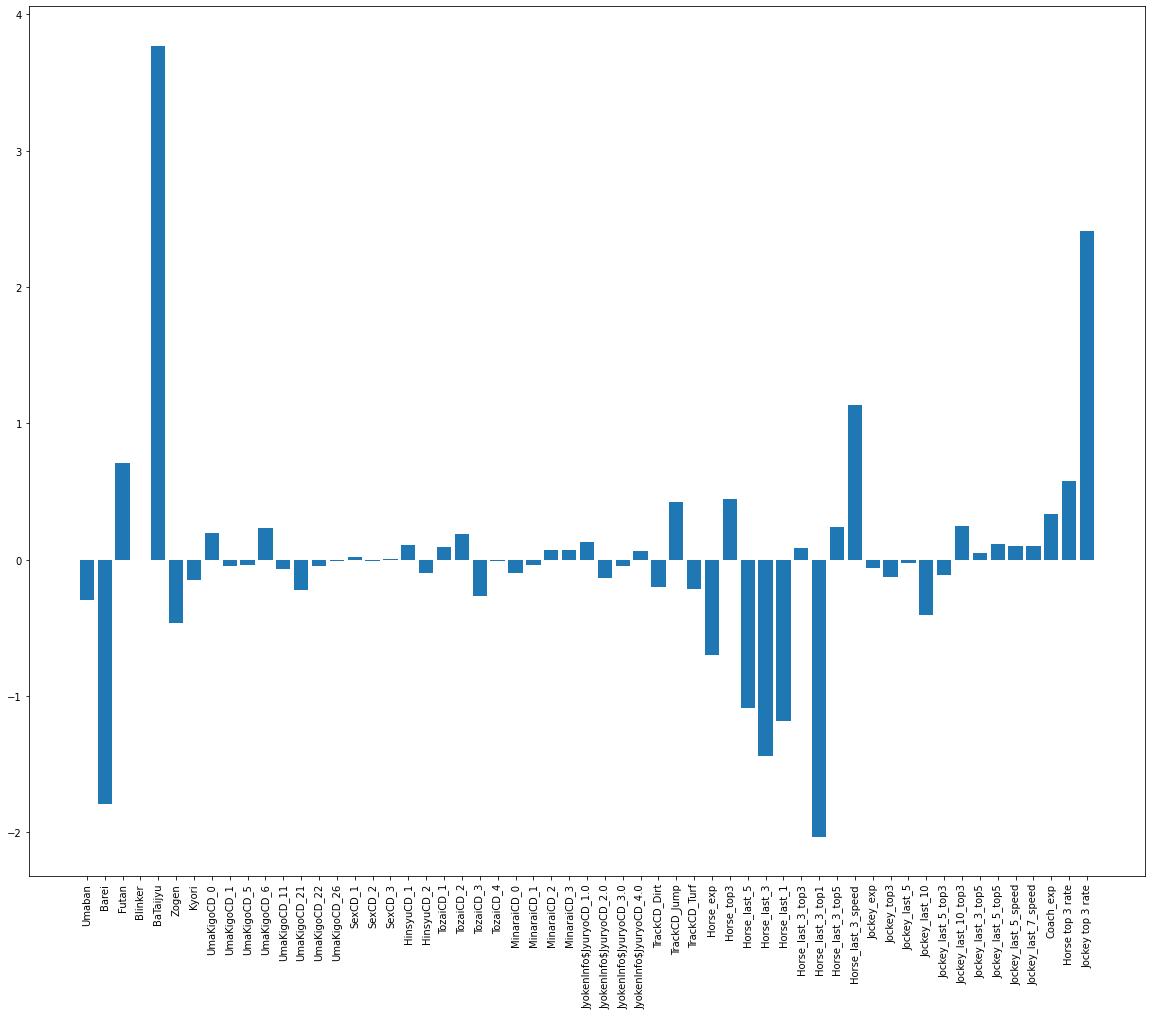

In [19]:
plt.figure(figsize=(20,16))
plt.bar(height=model_Log.coef_[0], x = list(map(str, X_train.columns)))
xticks = plt.xticks(rotation=90)

# Error analysis

In [20]:
from sklearn.metrics import log_loss

In [21]:
top3_pred = predict_top3_prob(model_Log, X_train_sc, raceid_train)
print('Total accuracy:', accuracy_score(top3_train, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_train.values, top3_pred['Top 3'].values))

Total accuracy: 0.770855613369821
Top 3 prediction accuracy: 0.4468618118050604


In [22]:
top3_pred['Truth'] = y_train
print('Log loss:',log_loss(top3_pred['Truth'], top3_pred['Top 3 prob']))
top3_pred.head()

Log loss: 0.4485729701009832


,raceid,Top 3 prob,Top 3,Truth
0,2008-01-05 01:06,0.084516,False,False
1,2008-01-05 01:06,0.097789,True,True
2,2008-01-05 01:06,0.093675,True,True
3,2008-01-05 01:06,0.080328,False,False
4,2008-01-05 01:06,0.099292,True,True


In [23]:
loss = - (top3_pred['Truth']*np.log(top3_pred['Top 3 prob']) + (1-top3_pred['Truth'])*np.log(1-top3_pred['Top 3 prob']))

In [24]:
df_train = X_train.copy()
df_train['Top 3'] = top3_train
df_train['Top 3 Pred'] = top3_pred['Top 3']
df_train['Top 3 Prob'] = top3_pred['Top 3 prob']
df_train['loss'] = loss
df_train_error = df_train[df_train['Top 3'] != df_train['Top 3 Pred']]
df_train_error.sort_values('loss', ascending=True).head()

,Umaban,Barei,Futan,Blinker,BaTaijyu,Zogen,Kyori,UmaKigoCD_0,UmaKigoCD_1,UmaKigoCD_5,UmaKigoCD_6,UmaKigoCD_11,UmaKigoCD_21,UmaKigoCD_22,UmaKigoCD_26,SexCD_1,SexCD_2,SexCD_3,HinsyuCD_1,HinsyuCD_2,TozaiCD_1,TozaiCD_2,TozaiCD_3,TozaiCD_4,MinaraiCD_0,MinaraiCD_1,MinaraiCD_2,MinaraiCD_3,JyokenInfo$JyuryoCD_1.0,JyokenInfo$JyuryoCD_2.0,JyokenInfo$JyuryoCD_3.0,JyokenInfo$JyuryoCD_4.0,TrackCD_Dirt,TrackCD_Jump,TrackCD_Turf,Horse_exp,Horse_top3,Horse_last_5,Horse_last_3,Horse_last_1,Horse_last_3_top3,Horse_last_3_top1,Horse_last_3_top5,Horse_last_3_speed,Jockey_exp,Jockey_top3,Jockey_last_5,Jockey_last_10,Jockey_last_5_top3,Jockey_last_10_top3,Jockey_last_3_top5,Jockey_last_5_top5,Jockey_last_5_speed,Jockey_last_7_speed,Coach_exp,Horse top 3 rate,Jockey top 3 rate,Top 3,Top 3 Pred,Top 3 Prob,loss
433666,1,2,540,0,464,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,250.000000,150.000000,50.000000,0.6,0.0,1.0,4.800000,104.0,18.0,333.750000,757.807143,1.0,1.0,1.0,1.0,8.178491,11.500685,5.0,0.000000,0.173077,False,True,0.067519,0.069906
240960,5,4,550,0,454,4.0,1000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,12.0,6.0,344.900000,181.200000,80.200000,1.0,1.0,1.0,5.180573,2329.0,429.0,83.941176,364.033613,3.0,3.0,3.0,5.0,8.305792,11.632272,235.0,0.500000,0.184199,False,True,0.075487,0.078488
312776,8,4,540,0,462,4.0,2200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0,2.0,284.889916,241.348739,76.705882,0.0,0.0,0.0,4.559926,5112.0,1395.0,159.656303,291.452456,1.0,3.0,2.0,2.0,8.208912,11.571454,447.0,0.250000,0.272887,False,True,0.089970,0.094278
50746,1,6,560,0,510,0.0,1800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10.0,4.0,201.350000,199.350000,91.750000,0.0,0.0,0.0,5.061018,948.0,179.0,236.942857,488.736975,1.0,2.0,1.0,3.0,8.436585,11.685357,62.0,0.400000,0.188819,False,True,0.095574,0.100455
152865,7,4,560,0,486,12.0,2200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.0,4.0,251.675000,187.800000,75.250000,1.0,0.0,1.0,4.894658,1211.0,128.0,266.642857,562.042857,2.0,3.0,1.0,2.0,8.104489,11.341413,61.0,0.363636,0.105698,False,True,0.097132,0.102178


## Model error

In [25]:
X_err = df_train_error.drop(['Top 3','Top 3 Pred', 'Top 3 Prob', 'loss'], axis=1)
y_err = df_train_error['Top 3']

In [ ]:
model_err = LogisticRegression(max_iter=500, penalty='l2', C=0.1)
model_err.fit(X_err, y_err)

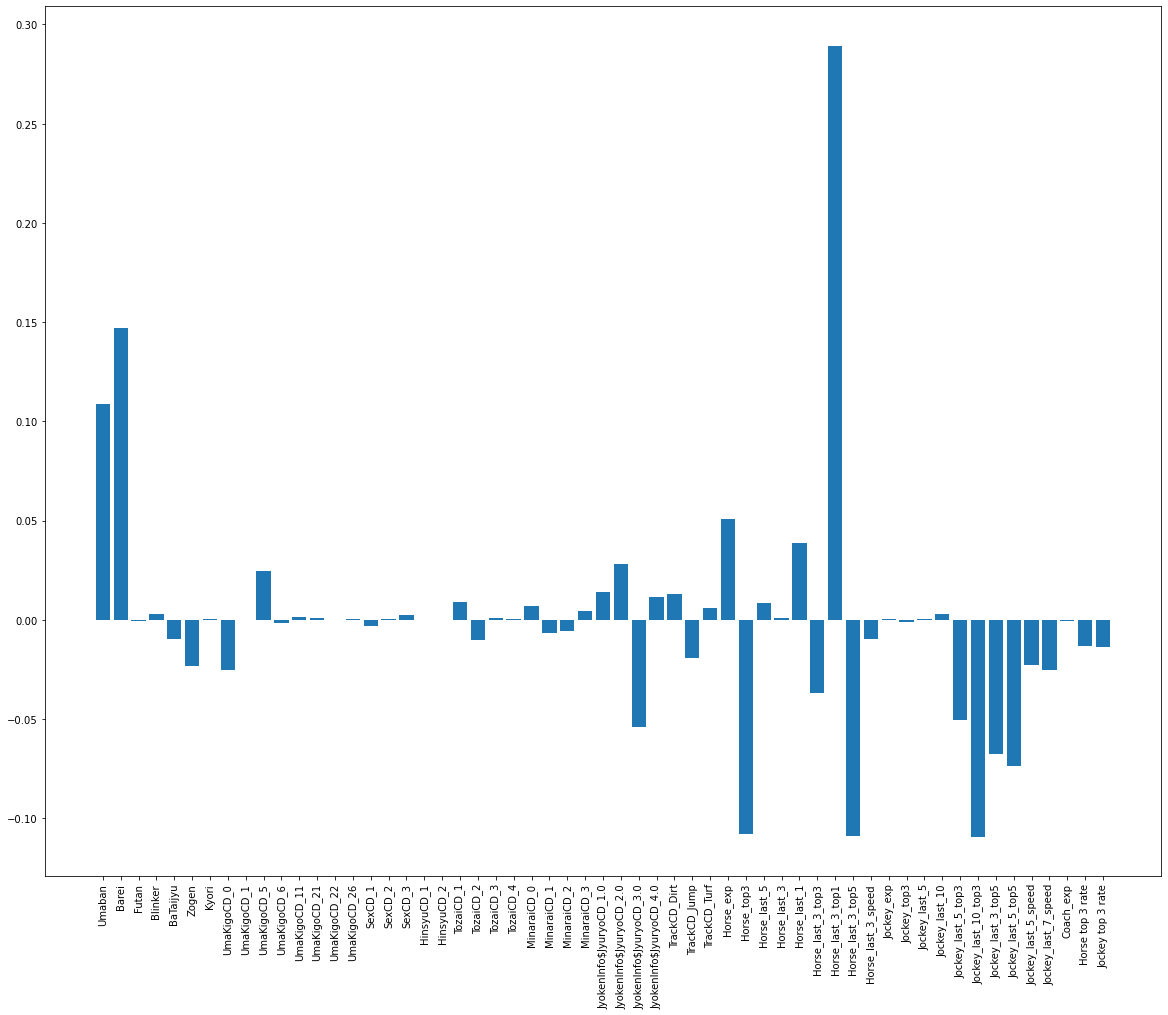

In [28]:
plt.figure(figsize=(20,16))
plt.bar(height=model_err.coef_[0], x = list(map(str, X_err.columns)))
xticks = plt.xticks(rotation=90)

In [29]:
ineff_cols = np.sign(model_err.coef_[0]) != np.sign(model_Log.coef_[0])
X_err.columns[ineff_cols]

Index(['Umaban', 'Barei', 'Futan', 'BaTaijyu', 'Kyori', 'UmaKigoCD_0',
       'UmaKigoCD_1', 'UmaKigoCD_5', 'UmaKigoCD_6', 'UmaKigoCD_11',
       'UmaKigoCD_21', 'UmaKigoCD_22', 'UmaKigoCD_26', 'SexCD_1', 'SexCD_2',
       'HinsyuCD_1', 'HinsyuCD_2', 'TozaiCD_2', 'TozaiCD_3', 'TozaiCD_4',
       'MinaraiCD_0', 'MinaraiCD_2', 'JyokenInfo$JyuryoCD_2.0', 'TrackCD_Dirt',
       'TrackCD_Jump', 'TrackCD_Turf', 'Horse_exp', 'Horse_top3',
       'Horse_last_5', 'Horse_last_3', 'Horse_last_1', 'Horse_last_3_top3',
       'Horse_last_3_top1', 'Horse_last_3_top5', 'Horse_last_3_speed',
       'Jockey_exp', 'Jockey_last_5', 'Jockey_last_10', 'Jockey_last_10_top3',
       'Jockey_last_3_top5', 'Jockey_last_5_top5', 'Jockey_last_5_speed',
       'Jockey_last_7_speed', 'Coach_exp', 'Horse top 3 rate',
       'Jockey top 3 rate'],
      dtype='object')

## Look at some horses

In [36]:
df_ = df[df['Top 3']].groupby('KettoNum')
groups = list(df_.groups.keys())
df_horse=df.groupby('KettoNum')
cols=['Time', 'KakuteiJyuni_fixed', 'Top 1', 'Top 3', 'Speed_fixed', 'Coach_exp','Horse_top3', 'Horse_exp','Horse_last_3_top3', 'Jockey_last_5_top3', 'Horse top 3 rate', 'Jockey top 3 rate']


In [38]:
df_horse.get_group(groups[np.random.randint(0, len(groups))])[cols]

,Time,KakuteiJyuni_fixed,Top 1,Top 3,Speed_fixed,Coach_exp,Horse_top3,Horse_exp,Horse_last_3_top3,Jockey_last_5_top3,Horse top 3 rate,Jockey top 3 rate
323144,883,60.400000,False,False,1.648123,367.0,0.0,0.0,6.000000e-01,1.0,0.00,0.139519
326203,1160,64.642857,False,False,1.613009,369.0,0.0,1.0,4.000000e-01,1.0,0.00,0.138112
328738,702,34.000000,False,False,1.702876,373.0,0.0,2.0,2.000000e-01,1.0,0.00,0.189885
335435,587,8.615385,False,True,1.770859,380.0,0.0,3.0,5.551115e-17,0.0,0.00,0.136752
337365,729,20.800000,False,False,1.711102,383.0,1.0,4.0,1.000000e+00,0.0,0.25,0.137107


# DNN model

## Data

In [12]:
X = df
y = df['Top 3']
top3 = df['Top 3']
raceid = df['raceid']
X_train, X_test, y_train, y_test, top3_train, top3_test, raceid_train, raceid_test = split_data(X, y, raceid, top3,
                                                                                                drop_columns=drop_cols,
                                                                                                select_cols=None,
                                                                                                test_size=25402)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(500261, 57) (500261,)
(25402, 57) (25402,)


,Umaban,Barei,Futan,Blinker,BaTaijyu,Zogen,Kyori,UmaKigoCD_0,UmaKigoCD_1,UmaKigoCD_5,UmaKigoCD_6,UmaKigoCD_11,UmaKigoCD_21,UmaKigoCD_22,UmaKigoCD_26,SexCD_1,SexCD_2,SexCD_3,HinsyuCD_1,HinsyuCD_2,TozaiCD_1,TozaiCD_2,TozaiCD_3,TozaiCD_4,MinaraiCD_0,MinaraiCD_1,MinaraiCD_2,MinaraiCD_3,JyokenInfo$JyuryoCD_1.0,JyokenInfo$JyuryoCD_2.0,JyokenInfo$JyuryoCD_3.0,JyokenInfo$JyuryoCD_4.0,TrackCD_Dirt,TrackCD_Jump,TrackCD_Turf,Horse_exp,Horse_top3,Horse_last_5,Horse_last_3,Horse_last_1,Horse_last_3_top3,Horse_last_3_top1,Horse_last_3_top5,Horse_last_3_speed,Jockey_exp,Jockey_top3,Jockey_last_5,Jockey_last_10,Jockey_last_5_top3,Jockey_last_10_top3,Jockey_last_3_top5,Jockey_last_5_top5,Jockey_last_5_speed,Jockey_last_7_speed,Coach_exp,Horse top 3 rate,Jockey top 3 rate
0,1,3,540,0,428,12.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,150.0,50.0,0.6,0.0,1.0,4.8,0.0,0.0,250.0,500.0,1.0,2.0,1.0,1.5,8.0,11.2,0.0,0.0,0.0
1,2,3,540,0,450,-10.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,150.0,50.0,0.6,0.0,1.0,4.8,0.0,0.0,250.0,500.0,1.0,2.0,1.0,1.5,8.0,11.2,0.0,0.0,0.0
2,3,3,540,0,458,4.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,150.0,50.0,0.6,0.0,1.0,4.8,0.0,0.0,250.0,500.0,1.0,2.0,1.0,1.5,8.0,11.2,0.0,0.0,0.0
3,4,3,540,0,402,-10.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,150.0,50.0,0.6,0.0,1.0,4.8,0.0,0.0,250.0,500.0,1.0,2.0,1.0,1.5,8.0,11.2,0.0,0.0,0.0
4,5,3,540,0,482,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,150.0,50.0,0.6,0.0,1.0,4.8,0.0,0.0,250.0,500.0,1.0,2.0,1.0,1.5,8.0,11.2,0.0,0.0,0.0


In [13]:
X_train, X_val, y_train, y_val, top3_train, top3_val, raceid_train, raceid_val = split_data(X_train, y_train, raceid_train, top3_train,
                                                                                            drop_columns=None,
                                                                                            select_cols=None,
                                                                                            test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)


(450815, 57) (450815,)
(49446, 57) (49446,)


In [14]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

## Model

In [61]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [62]:
model_nn.compile(
                # loss = tf.keras.losses.BinaryFocalCrossentropy(),
                loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['acc'])

In [63]:
callbacks = callbacks=[tf.keras.callbacks.ReduceLROnPlateau(fractions=0.1,monitor='val_loss', patience=5),
                       tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=0.0001),
                       tf.keras.callbacks.ModelCheckpoint('model.hdf5', save_best_only=True)]

In [ ]:
history = model_nn.fit(X_train_sc, y_train,
                       epochs = 200,
                       validation_data=(X_val_sc, y_val),
                       batch_size=1024,
                       class_weight={0:0.2, 1:0.8},
                       callbacks=callbacks)

## Evaluate

In [69]:
model_nn = tf.keras.models.load_model('model.hdf5')

In [26]:
top3_pred = predict_top3_prob(model_nn, X_train_sc, raceid_train)
print('Total accuracy:', accuracy_score(top3_train, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_train.values, top3_pred['Top 3'].values))

Total accuracy: 0.7769373246231824
Top 3 prediction accuracy: 0.46083743842364533


In [70]:
top3_pred = predict_top3_prob(model_nn, X_val_sc, raceid_val)
print('Total accuracy:', accuracy_score(top3_val, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_val.values, top3_pred['Top 3'].values))

Total accuracy: 0.7732880313877766
Top 3 prediction accuracy: 0.45896598116471266


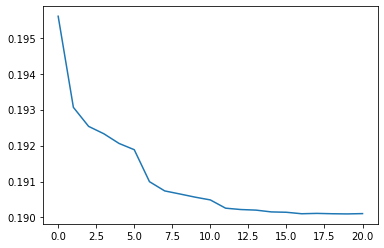

In [67]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

## Final result

In [71]:
top3_pred = predict_top3_prob(model_nn, X_test_sc, raceid_test)
print('Total accuracy:', accuracy_score(top3_test, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_test.values, top3_pred['Top 3'].values))

Total accuracy: 0.7818675694827179
Top 3 prediction accuracy: 0.4727272727272727
